<a href="https://colab.research.google.com/github/mavrick0/DEEP-LEARNING-EXPRIMENTS/blob/main/DLO602.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 64s 144ms/step - accuracy: 0.8596 - loss: 0.4975 - val_accuracy: 0.9818 - val_loss: 0.0665
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 46s 108ms/step - accuracy: 0.9804 - loss: 0.0649 - val_accuracy: 0.9848 - val_loss: 0.0510
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 113ms/step - accuracy: 0.9852 - loss: 0.0472 - val_accuracy: 0.9893 - val_loss: 0.0389
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9903 - loss: 0.0311 - val_accuracy: 0.9895 - val_loss: 0.0375
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 45s 106ms/step - accuracy: 0.9930 - loss: 0.0224 - val_accuracy: 0.9885 - val_loss: 0.0407
313/313 - 3s - 11ms/step - accuracy: 0.9885 - loss: 0.0336
Test accuracy: 0.9885
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Predicted label: 7
True label: 7


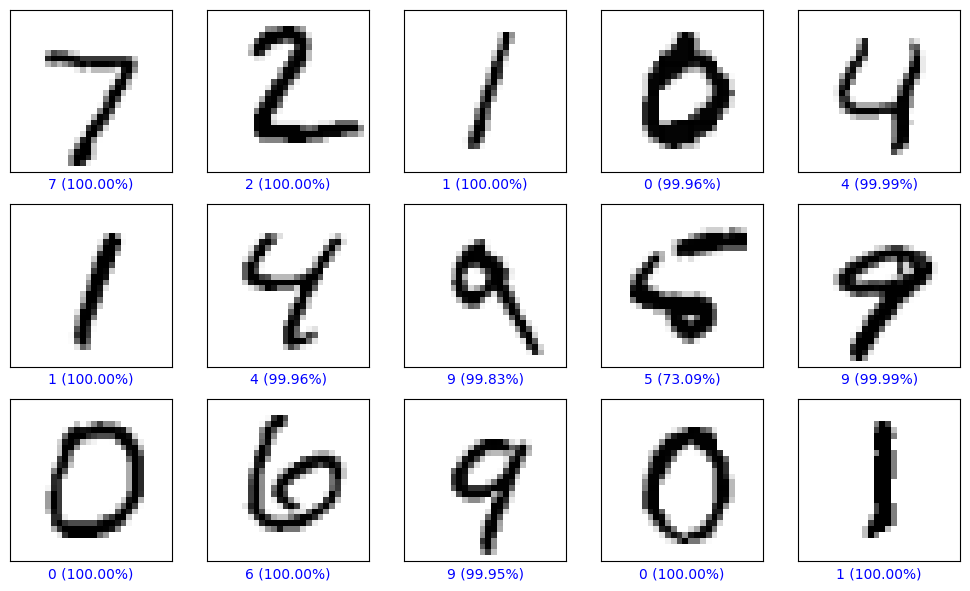

In [ ]:
# Install required libraries
# pip install tensorflow numpy matplotlib

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize pixel values to the [0, 1] range
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data to add channel dimension (required for CNNs)
x_train = x_train[..., np.newaxis]  # Shape: (60000, 28, 28, 1)
x_test = x_test[..., np.newaxis]  # Shape: (10000, 28, 28, 1)

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")

# Build the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1  # Fixed '=' to ':'
)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Make predictions on the test data
predictions = model.predict(x_test)

# Predict the label of the first test image
predicted_label = np.argmax(predictions[0])
true_label = y_test[0]
print(f"Predicted label: {predicted_label}")
print(f"True label: {true_label}")


# Function to plot an image and its prediction
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label else 'red'
    plt.xlabel(f"{predicted_label} ({100 * np.max(predictions_array):.2f}%)", color=color)


# Plot the first 15 test images and their predictions
num_rows, num_cols = 3, 5
plt.figure(figsize=(2 * num_cols, 2 * num_rows))
for i in range(num_rows * num_cols):
    plt.subplot(num_rows, num_cols, i + 1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()
